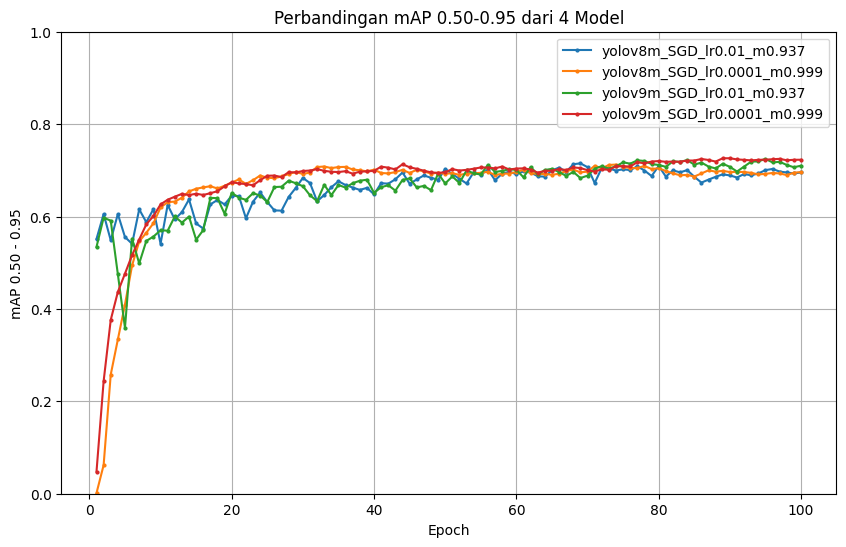

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Path ke 4 file results.csv
paths = {
    'yolov8m_SGD_lr0.01_m0.937': 'runs\detect\YOLOv8m_SGD_lr0.01_momentum0.937/results.csv',
    'yolov8m_SGD_lr0.0001_m0.999': 'runs\detect\YOLOv8m_SGD_lr0.0001_momentum0.999/results.csv',
    'yolov9m_SGD_lr0.01_m0.937': 'runs\detect\YOLOv9m_SGD_lr0.01_momentum0.937/results.csv',
    'yolov9m_SGD_lr0.0001_m0.999': 'runs\detect\YOLOv9m_SGD_lr0.0001_momentum0.999/results.csv'
    
}

# Membaca semua CSV
results = {}
for name, path in paths.items():
    df = pd.read_csv(path)
    results[name] = df

# Plot mAP50-95 vs epoch dengan marker kecil
plt.figure(figsize=(10, 6))

for name, df in results.items():
    plt.plot(df['epoch'], df['metrics/mAP50-95(B)'], marker='o', markersize=2, label=name)  # marker kecil

plt.xlabel('Epoch')
plt.ylabel('mAP 0.50 - 0.95')
plt.title('Perbandingan mAP 0.50-0.95 dari 4 Model')
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.show()


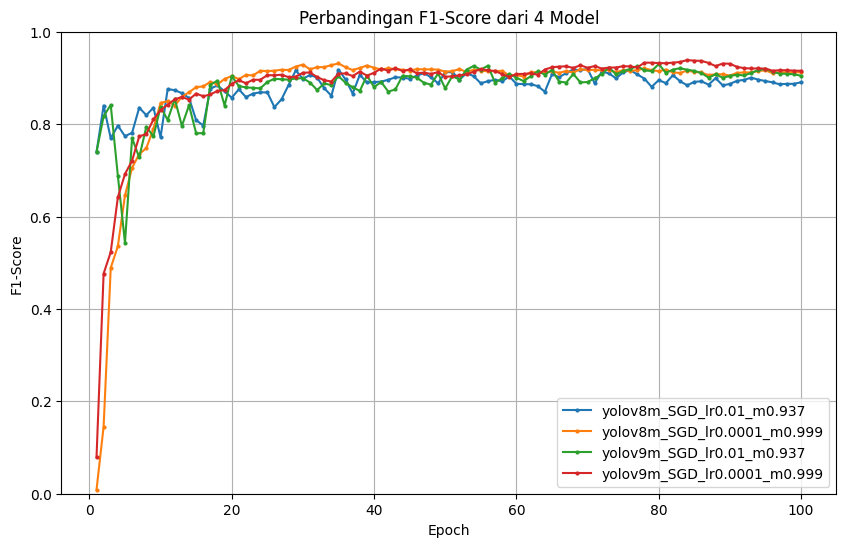

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Path ke file results.csv
paths = {
    'yolov8m_SGD_lr0.01_m0.937': 'runs/detect/YOLOv8m_SGD_lr0.01_momentum0.937/results.csv',
    'yolov8m_SGD_lr0.0001_m0.999': 'runs/detect/YOLOv8m_SGD_lr0.0001_momentum0.999/results.csv',
    'yolov9m_SGD_lr0.01_m0.937': 'runs/detect/YOLOv9m_SGD_lr0.01_momentum0.937/results.csv',
    'yolov9m_SGD_lr0.0001_m0.999': 'runs/detect/YOLOv9m_SGD_lr0.0001_momentum0.999/results.csv'
}

# Membaca semua CSV dan hitung F1
results = {}
for name, path in paths.items():
    df = pd.read_csv(path)
    precision = df['metrics/precision(B)']
    recall = df['metrics/recall(B)']
    df['F1-Score'] = 2 * (precision * recall) / (precision + recall + 1e-9)  # +1e-9 untuk menghindari pembagian 0
    results[name] = df

# Plot F1-Score vs Epoch
plt.figure(figsize=(10, 6))

for name, df in results.items():
    plt.plot(df['epoch'], df['F1-Score'], marker='o', markersize=2, label=name)

plt.xlabel('Epoch')
plt.ylabel('F1-Score')
plt.title('Perbandingan F1-Score dari 4 Model')
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.show()


In [19]:
# Menampilkan statistik F1-Score
for name, df in results.items():
    max_f1 = df['F1-Score'].max()
    mean_f1 = df['F1-Score'].mean()
    last_f1 = df['F1-Score'].iloc[-1]
    
    print(f"Model: {name}")
    print(f"  Max F1-Score     : {max_f1:.2f}")
    print(f"  Mean F1-Score    : {mean_f1:.2f}")
    print(f"  Last F1-Score    : {last_f1:.2f}")
    print("-" * 40)


Model: yolov8m_SGD_lr0.01_m0.937
  Max F1-Score     : 0.92
  Mean F1-Score    : 0.88
  Last F1-Score    : 0.89
----------------------------------------
Model: yolov8m_SGD_lr0.0001_m0.999
  Max F1-Score     : 0.93
  Mean F1-Score    : 0.88
  Last F1-Score    : 0.91
----------------------------------------
Model: yolov9m_SGD_lr0.01_m0.937
  Max F1-Score     : 0.93
  Mean F1-Score    : 0.88
  Last F1-Score    : 0.90
----------------------------------------
Model: yolov9m_SGD_lr0.0001_m0.999
  Max F1-Score     : 0.94
  Mean F1-Score    : 0.88
  Last F1-Score    : 0.92
----------------------------------------
